In [19]:
import xarray as xr
import cfgrib
import pandas as pd
import os
import numpy as np
from scripts.paths import *
import matplotlib.pyplot as plt

In [2]:
s_per_y = 60 * 60 * 24 * 365

In [3]:
folder_base = "/Volumes/imau02/rapid/Anneke/CARRA/"


In [4]:
LSM = xr.open_dataset(folder_base+ "Land_sea_mask_CARRA.nc")


In [5]:
# LSM_grid = LSM[['longitude', 'latitude']].to_dataframe().reset_index()[['latitude', 'longitude']]# .to_csv(pathDataTemp+ "CARRA_grid/CARRA_grid_2.5km.csv")
# # lsm lon - 360
# LSM_grid['longitude'] = LSM_grid['longitude'] - 360
# LSM_grid.to_csv(pathDataTemp+ "CARRA_grid/CARRA_grid_2.5km.csv")

LSM_grid_2_5 = pd.read_csv(pathDataTemp+ "CARRA_grid/CARRA_grid_2.5km.csv")

# Surface Runoff

In [6]:
folder = "/Volumes/imau02/rapid/Anneke/CARRA/3-hourly/"
variable = "surface_runoff"
time_res = "3h"
year = 2022

In [7]:
import glob

# Define the search pattern
pattern = f"{folder}*{variable}*{time_res}*{year}*"

# Use glob to find all files that match the pattern
files = glob.glob(pattern)



In [8]:
file = "/Volumes/imau02/rapid/Anneke/CARRA/3-hourly/surface_runoff.CARRA.west_domain.3h.2009.1.grib"

In [55]:
ds = xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/3-hourly/surface_runoff.CARRA.west_domain.forecast.24h.2023.7.grib", engine="cfgrib")
ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 31, step: 8, y: 1269, x: 1069)
Coordinates:
  * time        (time) datetime64[ns] 248B 2023-07-01 2023-07-02 ... 2023-07-31
  * step        (step) timedelta64[ns] 64B 03:00:00 06:00:00 ... 1 days 00:00:00
    surface     float64 8B ...
    latitude    (y, x) float64 11MB ...
    longitude   (y, x) float64 11MB ...
    valid_time  (time, step) datetime64[ns] 2kB ...
Dimensions without coordinates: y, x
Data variables:
    sro         (time, step, y, x) float32 1GB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-06-18T13:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [73]:
title_month = ds.time.resample(time='MS').min().values[0]

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_77835/331604329.py:1: DeprecationWarning:

dropping variables using `drop` is deprecated; use drop_vars.



Text(0.5, 1.0, '2023-07')

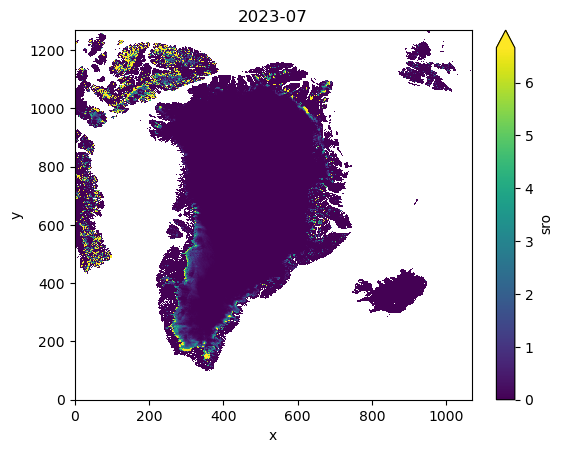

In [76]:
ds.isel(step=-1).squeeze().drop('surface').drop('step').mean('time')['sro'].plot(robust=True)
plt.title(str(title_month)[:7])

In [57]:
ds_time = ds.sum(dim=['x', 'y'])

In [58]:
def ravel_time_step(ds):
    # Add the valid_time coordinate
    ds = ds.assign_coords(valid_time=(ds.time + ds.step))

    # Ravel the dataset
    raveled_ds = ds.stack(valid_time_raveled=('time', 'step')).reset_index('valid_time_raveled')

    # Select the variables and drop the old dimensions
    raveled_ds = raveled_ds[['sro', 'valid_time']].set_index(valid_time_raveled='valid_time').drop(['time', 'step'])

    return raveled_ds



In [59]:
import plotly.express as px
raveled_ds = ravel_time_step(ds_time)
raveled_ds = raveled_ds.drop('surface')
df_sro = raveled_ds.to_dataframe()
df_sro
px.line(df_sro)

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_77835/3760280651.py:9: DeprecationWarning:

dropping variables using `drop` is deprecated; use drop_vars.

/var/folders/cv/s_h5gzxd0h71t_d875wqxgzh0000gn/T/ipykernel_77835/1588288400.py:3: DeprecationWarning:

dropping variables using `drop` is deprecated; use drop_vars.



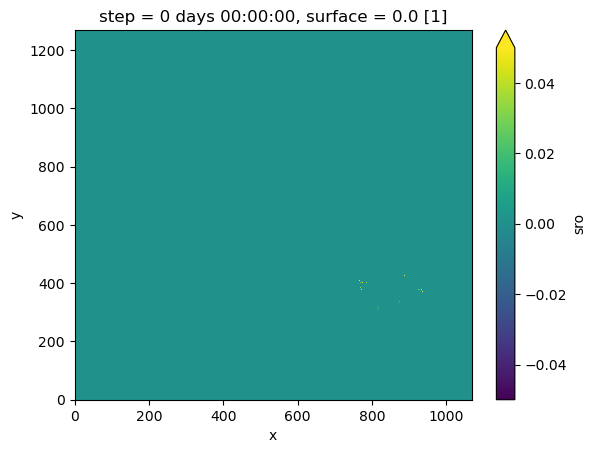

In [81]:
(ds* s_per_3h).sum(dim='time')['sro'].plot(robust=True)

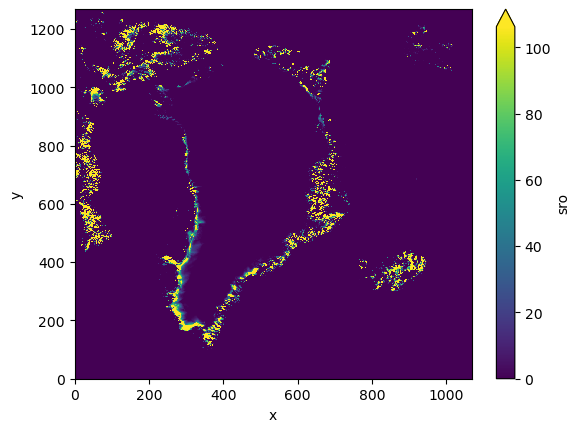

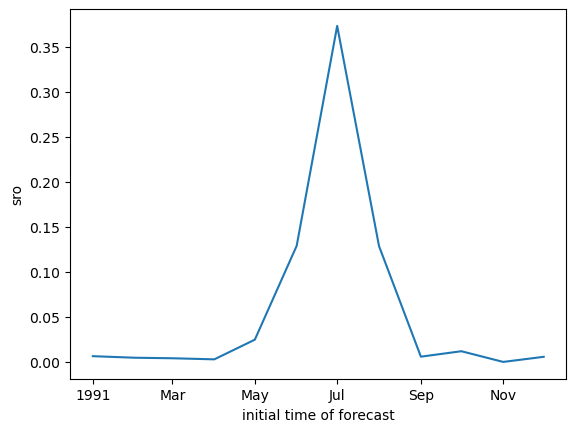

In [83]:
# open 
sro_1991 = "/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1991.sum.nc"

ds = xr.open_dataset(sro_1991)
ds['sro'].sum(dim='time').plot(robust=True)
plt.show()

ds_mean = xr.open_dataset(sro_1991.replace('sum', 'mean'))

ds_mean['sro'].mean(dim=['x', 'y']).plot()






In [6]:
# find all files in this folder:
# "/Volumes/imau02/rapid/Anneke/CARRA/Monthly
import numpy as np
import glob
files = glob.glob("/Volumes/imau02/rapid/Anneke/CARRA/Monthly/*")
files = np.sort(files)
print(files)


['/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1991.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1992.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1993.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1994.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1995.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1996.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1997.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1998.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.1999.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.2000.nc'
 '/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surfa

In [7]:
from tqdm import tqdm

def combine_files(files, dim="time"):
    ds_list = []
    for i, file in tqdm(enumerate(files)):
        ds = xr.open_dataset(file)
        ds_list.append(ds)
    ds_monthly = xr.concat(ds_list, dim=dim)
    return ds_monthly
ds_monthly = combine_files(files)

33it [00:29,  1.12it/s]


The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


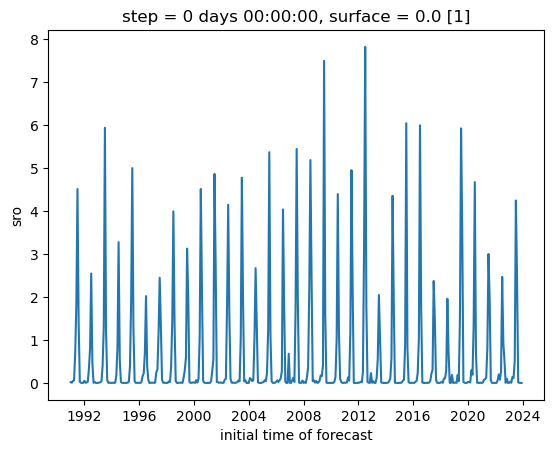

In [8]:
# arange ds_monthly by time
ds_monthly['sro'].sum(dim=['x', 'y']).plot()

In [13]:
ds

<xarray.Dataset> Size: 1GB
Dimensions:     (time: 31, step: 8, y: 1269, x: 1069)
Coordinates:
  * time        (time) datetime64[ns] 248B 2023-01-01 2023-01-02 ... 2023-01-31
  * step        (step) timedelta64[ns] 64B 03:00:00 06:00:00 ... 1 days 00:00:00
    surface     float64 8B ...
    latitude    (y, x) float64 11MB ...
    longitude   (y, x) float64 11MB ...
    valid_time  (time, step) datetime64[ns] 2kB ...
Dimensions without coordinates: y, x
Data variables:
    sro         (time, step, y, x) float32 1GB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-06-18T12:00 GRIB to CDM+CF via cfgrib-0.9.1...

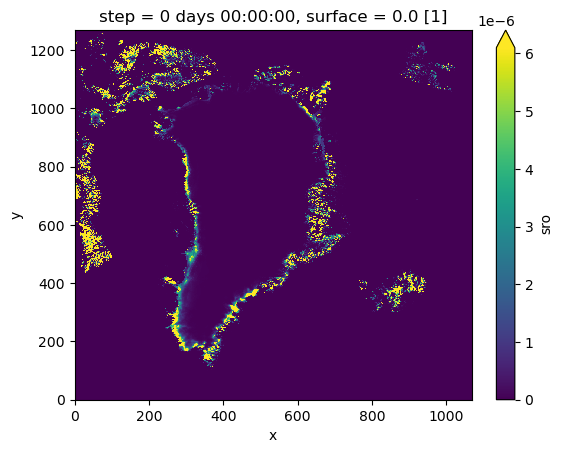

In [9]:
ds_monthly['sro'].mean(dim=['time']).plot(robust=True)

In [18]:
# mean runoff in june
ds_monthly_climatology = ds_monthly['sro'].groupby(ds_monthly['sro'].time.dt.month).mean(dim='time')


: 

In [ ]:

names = 'CARRA'
domains = 'west_domain'
level_types = 'surface_or_atmosphere'
variables = list(['surface_runoff'])
product_types = 'analysis'
variables = list(['surface_runoff'])
years =  list(range(1991,2023+1))


ofile = ".".join([variable,names,domains,'Monthly',str(year),'nc']) # similar naming convention as RACMO

In [99]:
file_2023 = "/Volumes/imau02/rapid/Anneke/CARRA/Monthly/surface_runoff.CARRA.west_domain.Monthly.2012.nc"

ds23 = xr.open_dataset(file_2023)
ds23


<xarray.Dataset> Size: 87MB
Dimensions:    (y: 1269, x: 1069, time: 12)
Coordinates:
    step       timedelta64[ns] 8B ...
    surface    float64 8B ...
    latitude   (y, x) float64 11MB ...
    longitude  (y, x) float64 11MB ...
  * time       (time) datetime64[ns] 96B 2012-01-01 2012-02-01 ... 2012-12-01
Dimensions without coordinates: y, x
Data variables:
    sro        (time, y, x) float32 65MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-05-14T18:14 GRIB to CDM+CF via cfgrib-0.9.1...

In [100]:
ds23_sum = ds23['sro'].sum(dim='time')


In [101]:
s_per_3h = 60 * 60 * 3

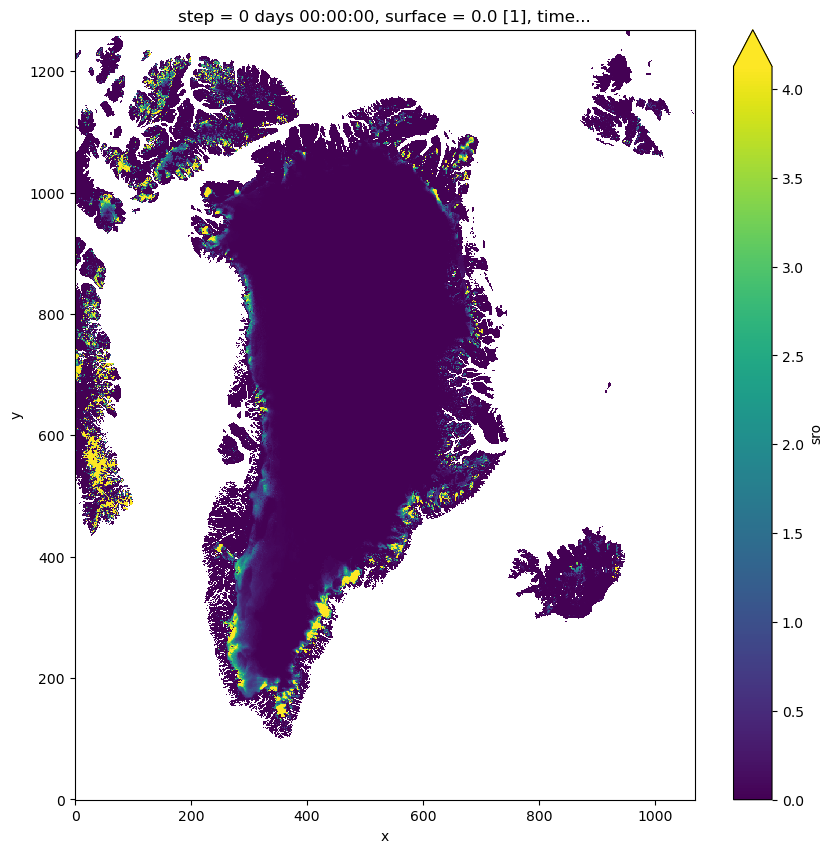

In [103]:
(ds23_sum.where(LSM['lsm'] == 1)* s_per_3h).plot(figsize=(10,10), robust=True)


In [104]:
CARRA_grid_size = 2500*2500
kg_to_km3we = 1e-9

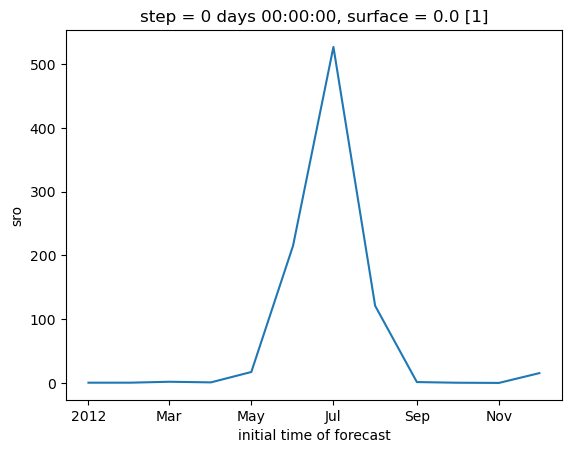

In [105]:
(ds23['sro'].sum(dim=['x', 'y'])*s_per_3h*CARRA_grid_size*kg_to_km3we).plot()


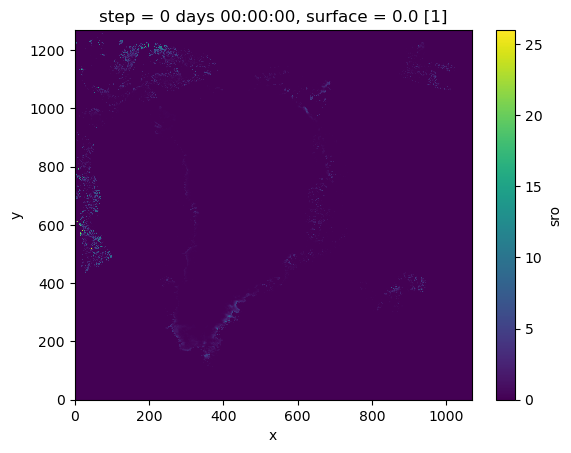

In [87]:
(ds23['sro'].sum(dim='time')*s_per_3h).plot()

In [44]:
LSM['lsm']

<xarray.DataArray 'lsm' (y: 1269, x: 1069)> Size: 5MB
[1356561 values with dtype=float32]
Coordinates:
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    latitude    (y, x) float64 11MB ...
    longitude   (y, x) float64 11MB ...
    valid_time  datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Attributes: (12/33)
    GRIB_paramId:                             172
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1356561
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Land-sea mask
    GRIB_shortName:                           lsm
    GRIB_units:                               (0 - 1)
    long_name:                                Land-sea mask
    units:                                    (0 - 1)
    standard_name:                            land_binary_mask

# Precipitation

In [14]:
file_precip = "/Volumes/imau02/rapid/Anneke/CARRA/3-hourly/total_precipitation.CARRA.west_domain.forecast.24h.2019.9.grib"

In [15]:
ds_prcip = xr.open_dataset(file_precip, engine="cfgrib")

In [16]:
ds_prcip24 = ds_prcip.isel(step=1)-ds_prcip.isel(step=0)

KeyboardInterrupt: 

In [ ]:
ds_prcip24['tp'].sum(dim=['x', 'y'])

<xarray.DataArray 'tp' (time: 30)> Size: 120B
array([2602727. , 2302412.2, 3086182.8, 2073373. , 2504255.2, 3355033. ,
       4603451. , 2315215. , 2182215.2, 2756523.8, 2598240. , 2763662.5,
       4079761.8, 2979114.2, 1952035.9, 1449262.5, 2679934.2, 3665604. ,
       3384195.2, 3933089.5, 3022827.8, 3416714. , 3381768.2, 2834822. ,
       1758328.4, 2267493.8, 1306519.1, 1070529.4,  892715.4, 1115834.9],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 240B 2019-09-01 2019-09-02 ... 2019-09-30
    surface  float64 8B 0.0

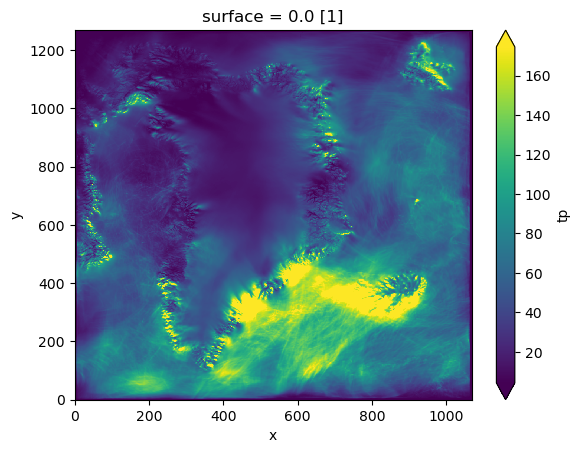

In [83]:
(ds_prcip24['tp'].sum(dim=['time'])).plot(robust=True)

In [5]:
ds_tp_2019 = xr.open_mfdataset("/Volumes/imau02/rapid/Anneke/CARRA/Monthly/total_precipitation.CARRA.west_domain.forecast.Monthly.2019.nc")

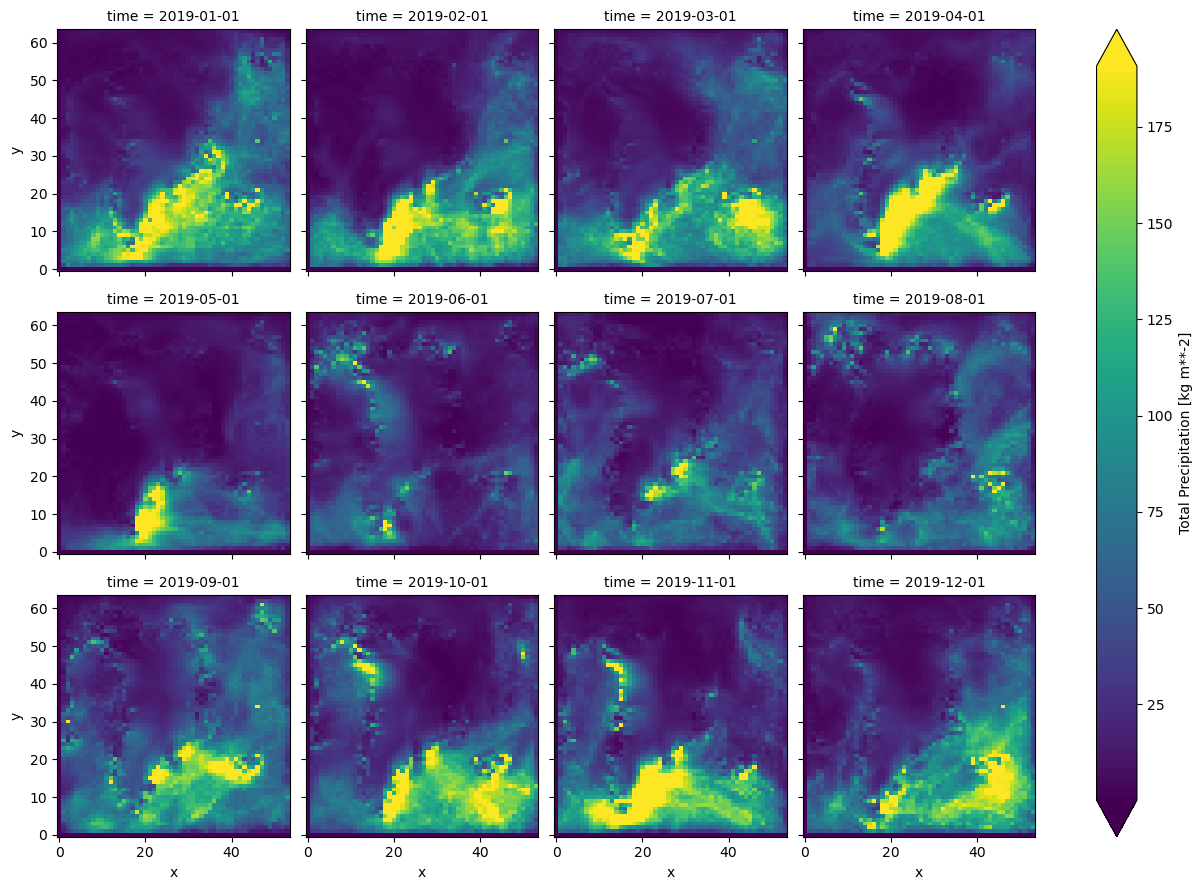

In [13]:
df_tp_2019['tp'].squeeze()[:, ::20,::20].plot(x='x',y='y',col='time',col_wrap=4, robust=True)

In [29]:
ds_prcip['tp']
# give attributes of ds_prcip to ds_prcip24
ds_prcip24.attrs = ds_prcip.attrs
ds_prcip24['tp'].attrs = ds_prcip['tp'].attrs
# add to attributes, description that it is a 24h forecast, sum per month
ds_prcip24.attrs['description'] = '24h forecast, sum per month'

In [36]:
ds_prcip24['tp'].resample(time='MS').sum()

<xarray.DataArray 'tp' (time: 1, y: 1269, x: 1069)> Size: 5MB
array([[[-1.4686584e-04, -1.4686584e-04,  0.0000000e+00, ...,
          5.3060532e-02,  5.0851822e-02,  5.2755356e-02],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          5.4658890e-02,  4.3308258e-02,  4.6276093e-02],
        [-1.4686584e-04, -1.4686584e-04,  0.0000000e+00, ...,
          4.8482895e-02,  4.6487808e-02,  5.1958084e-02],
        ...,
        [ 1.4548302e-01,  1.9585037e-01,  1.5989876e-01, ...,
          4.0217209e-01,  3.9049721e-01,  4.2631149e-01],
        [ 2.2590828e-01,  2.8532982e-01,  2.3483276e-01, ...,
          4.9025726e-01,  4.8551941e-01,  5.0263405e-01],
        [ 9.0068817e-02,  1.7080879e-01,  1.5011978e-01, ...,
          3.8394547e-01,  3.7753868e-01,  3.5993576e-01]]], dtype=float32)
Coordinates:
    surface    float64 8B 0.0
    latitude   (y, x) float64 11MB 55.81 55.82 55.82 55.83 ... 77.87 77.85 77.83
    longitude  (y, x) float64 11MB 302.9 302.9 303.0 303.0 ... 397.6 397.6 397.6
  * time       (time) datetime64[ns] 8B 2019-09-01
Dimensions without coordinates: y, x
Attributes: (12/33)
    GRIB_paramId:                             228228
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      1356561
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            accum
    ...                                       ...
    GRIB_name:                                Total Precipitation
    GRIB_shortName:                           tp
    GRIB_units:                               kg m**-2
    long_name:                                Total Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [108]:
file = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/total_precipitation.CARRA.west_domain.forecast.Yearly.2023-2023.nc"

ds_23_yearly = xr.open_dataset(file)
ds_23_yearly

<xarray.Dataset> Size: 27MB
Dimensions:    (y: 1269, x: 1069, time: 1)
Coordinates:
    surface    float64 8B ...
    latitude   (y, x) float64 11MB ...
    longitude  (y, x) float64 11MB ...
  * time       (time) datetime64[ns] 8B 2023-01-01
Dimensions without coordinates: y, x
Data variables:
    tp         (time, y, x) float32 5MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-05-16T15:40 GRIB to CDM+CF via cfgrib-0.9.1...
    description:             sum per year

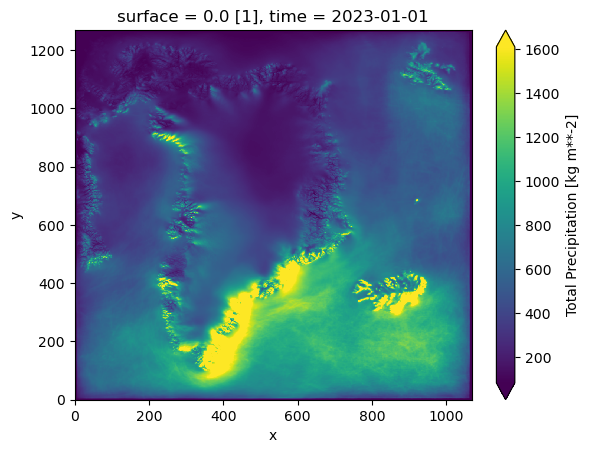

In [110]:
ds_23_yearly['tp'].plot(robust=True)


# Precipitation yearly average

In [16]:
file_monthly_precip = folder_base + "Monthly/total_precipitation.CARRA.west_domain.forecast.Monthly.2009-2023.nc"
ofolder_yearly = folder_base + "Yearly/"

names = "CARRA"
domains = "west_domain"
level_types = "surface_or_atmosphere"
variables = list(
    [
        "total_precipitation",
    ]
)
product_types = "forecast"
years = list(range(2009, 2023 + 1))[::-1]
variable = variables[0]


print("yearly average")

ofile_yearly = ".".join(
    [
        variable,
        names,
        domains,
        product_types,
        "Yearly",
        f"{np.min(years)}-{np.max(years)}",
        "nc",
    ]
)
print("----->" + ofolder_yearly + ofile_yearly)

ds_precip_yearly = xr.open_dataset(ofolder_yearly + ofile_yearly)


yearly average
----->/Volumes/imau02/rapid/Anneke/CARRA/Yearly/total_precipitation.CARRA.west_domain.forecast.Yearly.2009-2023.nc


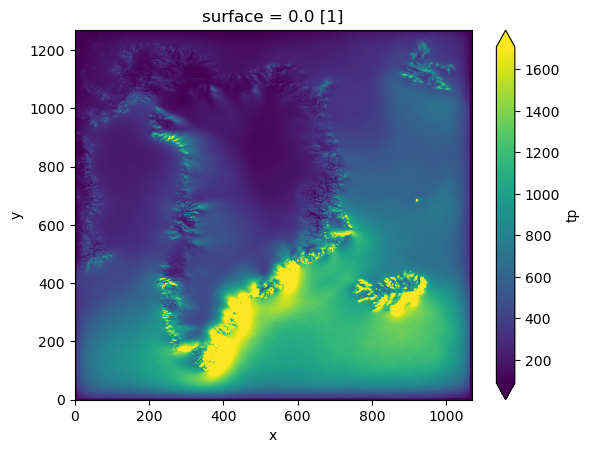

In [18]:
ds_precip_yearly['tp'].mean(dim='time').plot(robust=True)

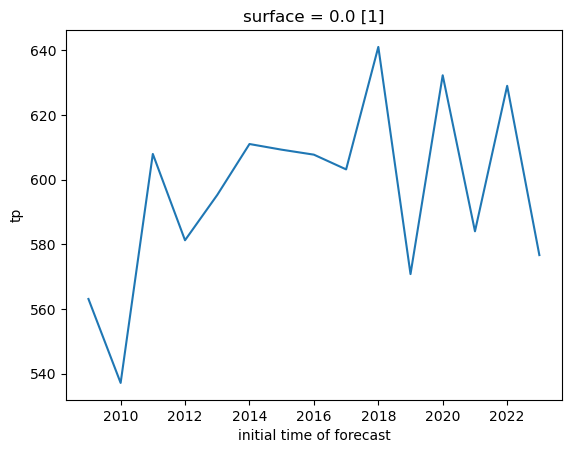

In [20]:
ds_precip_yearly['tp'].mean(dim=['x','y']).plot()

# REMAP

Opening datasets...
Opened RACMO ------> LSM
Opened CARRA ------> lsm
Preparing grid points...
Interpolating...
Plotting...


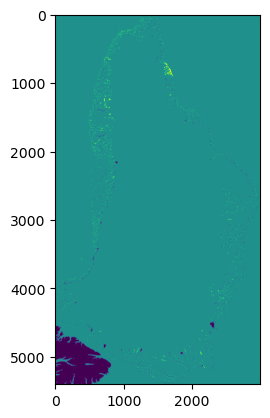

In [40]:
#%%
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import ListedColormap
from scipy.interpolate import griddata


folder_base = "/Volumes/imau02/rapid/Anneke/"
# folder_base = '/science/projects/imau02/rapid/Anneke/
folder_CARRA = folder_base + "CARRA/"
folder_RACMO = folder_base + "RACMO2.3p2/"

folder_out = folder_CARRA + "Monthly/on_RACMO_grid"
#%%
print("Opening datasets...")
LSM_CARRA = xr.open_dataset(folder_CARRA+ "Land_sea_mask_CARRA.nc")
# LSM_RACMO = xr.open_dataset(folder_RACMO+ "FGRN055/Downscaling_GR_500m/GrIS_topo_icemask_lsm_lon_lat_0.5km.nc")
LSM_RACMO = xr.open_mfdataset("/Users/annek/Documents/RACMO2.3p2/FGRN055/Downscaling_GR_500m/GrIS_topo_icemask_lsm_lon_lat_0.5km.nc")

#%% Dummy variable 
nvalues = len(LSM_CARRA['lsm'].values.ravel())
# LSM_CARRA['lsm'].values = np.arange(nvalues).reshape(LSM_CARRA['lsm'].values.shape)
#%% Define data that will be analyzed
# List of years
years = [2023]

# List of months
#months = [1,2,3,4,5,6,7,8,9,10,11,12]


# List of RACMO variables
variables_R = ['LSM'] #['ff10m']#['t2m']#'swsd','swsu','lwsd','lwsu']#,'swsd', 'swsu''precip']

# List of CARRA variables
variables_C = ['lsm']#['si10']#['t2m']#'ssr','ssrd','str','strd']

# Map of variable name for every dataset
variable_mapping = {
    #  'LWD': {'c': 'strd', 'r': 'lwsd'},
    #  'lat': {'c': 'latitude', 'r': 'lat'},
    #  'lon': {'c': 'longitude', 'r': 'lon'},
    #  'precip': {'c': 'tp', 'r': 'precip'},
     'lsm': {'c': 'lsm', 'r': 'LSM'},
}


#%% Open RACMO data and store in racmo dictionary

# Initialize an empty dictionary to store all RACMO data
racmo_data_dict = {}
mean_racmo_data_dict = {}

# # Loop through each year
# for year in years:
for variable in variables_R:
#         # Construct the file name for the current variable
#         file_name_racmo = f'{variable}.{year}.FGRN055_BN_RACMO2.3p2_ERA5_3h_1940_FGRN055.DD.nc'
#         fRACMO_variable = os.path.join(DATADIR_R.format(year=year), file_name_racmo)

#         # Open RACMO data for the current variable
#         variable_data = xr.open_dataset(fRACMO_variable)

#         # Slice the time dimension to include only our months
#         variable_data = variable_data.sel(time=variable_data.time.dt.month.isin([months]))

#         # Store the RACMO data in the dictionary
#         racmo_data_dict[f'{variable}_{year}' ] = variable_data
        
#         print('Opened RACMO ------>', variable, year)


    racmo_data_dict[f'{variable}'] = LSM_RACMO
    print('Opened RACMO ------>', variable)


#%% Open CARRA data and store in CARRA dictionary with year, month, variable as key


# Initialize an empty dictionary to store all CARRA data
carra_data_dict = {}
# Initialize an empty dictionary to store the daily mean CARRA data
day_carra_data_dict = {}
# Initialize an empty dictionary to store the mean CARRA data
mean_carra_data_dict = {}

for variable in variables_C:
    # Open CARRA data for the current variable
    carra_data_dict[f'{variable}'] = LSM_CARRA
    print('Opened CARRA ------>', variable)




#%% Plot difference between CARRA and interpolated RACMO
   
for variable, datasets in variable_mapping.items():
    ### Get data ###
    # Extract the carra and racmo data
    data_racmo = racmo_data_dict[f'{datasets["r"]}']
    data_carra = carra_data_dict[f'{datasets["c"]}']

    da_racmo = getattr(racmo_data_dict[f'{datasets["r"]}'], datasets["r"])
    values_racmo  = getattr(racmo_data_dict[f'{datasets["r"]}'], datasets["r"]).squeeze().values

    print("Preparing grid points...")
    # Prepare grid points        
    points_carra = (data_carra['longitude'].values.ravel()-360, data_carra['latitude'].values.ravel())
    values_carra = getattr(carra_data_dict[f'{datasets["c"]}'], datasets["c"]).values.ravel()#*100
    
    print("Interpolating...")
    # Interpolate CARRA data to downscaled RACMO grid
    interp_carra_values = griddata(points_carra, values_carra, (data_racmo.lon, data_racmo.lat), method='nearest') #method='linear')


    # Calculate the difference between RA and CARRA
    difference = values_racmo - interp_carra_values


    # interp_carra_values_reshaped = 

    # make an empty copy of ds_racmo
    da_carra_interp = da_racmo.copy()
    da_carra_interp.values = interp_carra_values#.reshape(data_racmo.lon.shape,)
    da_carra_interp.to_dataset(name=variable_mapping['lsm']['r']).to_netcdf(folder_CARRA+ "Land_sea_mask_CARRA_interp_RACMO.nc")


    

print("Plotting...")
plt.imshow(difference)



# %%


In [39]:
{variable_mapping['lsm']['r']}

{'LSM'}

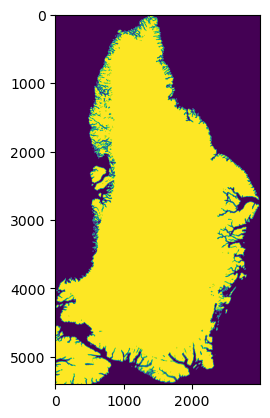

In [32]:
plt.imshow(interp_carra_values_reshaped)

In [48]:

variable_location = {
    'precip2009_2023_yearly' : 
     folder_CARRA + "Yearly/total_precipitation.CARRA.west_domain.forecast.Yearly.2009-2023.nc" 
}

variables_C = ['precip2009_2023_yearly']



#%% Open CARRA data and store in CARRA dictionary with year, month, variable as key


# Initialize an empty dictionary to store all CARRA data
carra_data_dict = {}

for variable in variables_C:
    # Open CARRA data for the current variable
    carra_data_dict[f'{variable}'] = xr.open_dataset(variable_location[f'{variable}'])
    print('Opened CARRA ------>', variable)



Opened CARRA ------> precip2009_2023_yearly


In [47]:
os.path.join(folder_CARRA + "Yearly/total_precipitation.CARRA.west_domain.forecast.Yearly.2009-2023.nc")

'/Volumes/imau02/rapid/Anneke/CARRA/Yearly/total_precipitation.CARRA.west_domain.forecast.Yearly.2009-2023.nc'

In [44]:
xr.open_dataset("/Volumes/imau02/rapid/Anneke/CARRA/Yearly/total_precipitation.CARRA.west_domain.forecast.Yearly.2009-2023.nc")

<xarray.Dataset> Size: 81MB
Dimensions:  (time: 15, y: 1269, x: 1069)
Coordinates:
    surface  float64 8B ...
  * time     (time) datetime64[ns] 120B 2009-01-01 2010-01-01 ... 2023-01-01
Dimensions without coordinates: y, x
Data variables:
    tp       (time, y, x) float32 81MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-05-16T15:40 GRIB to CDM+CF via cfgrib-0.9.1...
    description:             sum per year

# Regridded

In [18]:
masks1k = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/masks1k.nc"
dsmasks1k = xr.open_dataset(masks1k)
dsmasks1k

<xarray.Dataset> Size: 323MB
Dimensions:           (time: 1, x: 1496, y: 2700)
Coordinates:
  * time              (time) float32 4B 0.0
  * x                 (x) float32 6kB 5.0 10.0 15.0 ... 7.475e+03 7.48e+03
  * y                 (y) float32 11kB 5.0 10.0 15.0 ... 1.35e+04 1.35e+04
Data variables: (12/17)
    LON               (y, x) float32 16MB ...
    LAT               (y, x) float32 16MB ...
    Icemask           (y, x) float32 16MB ...
    Promicemask       (y, x) float32 16MB ...
    Topography        (y, x) float32 16MB ...
    GrIS              (y, x) float32 16MB ...
    ...                ...
    LSM_no_islands    (y, x) float32 16MB ...
    LSM_Qeqertarsuaq  (y, x) float32 16MB ...
    fjords_all        (y, x) float32 16MB ...
    LSM_average       (y, x) float64 32MB ...
    fjords            (y, x) int64 32MB ...
    small_clusters    (y, x) int64 32MB ...
Attributes:
    title:                      Daily Surface mass balance field (RACMO2.3)
    institution:                ULg (Xavier Fettweis)
    grid:                       Map Projection:Polar Stereographic Ellipsoid ...
    history:                    Mon Aug 10 13:33:00 2020: ncks -v Easting,Nor...
    netcdf:                     4.3.2 of Jan  5 2015 11:27:10 $
    NCO:                        netCDF Operators version 4.8.0 (Homepage = ht...
    history_of_appended_files:  Mon Aug 10 13:33:00 2020: Appended file GIMP_...

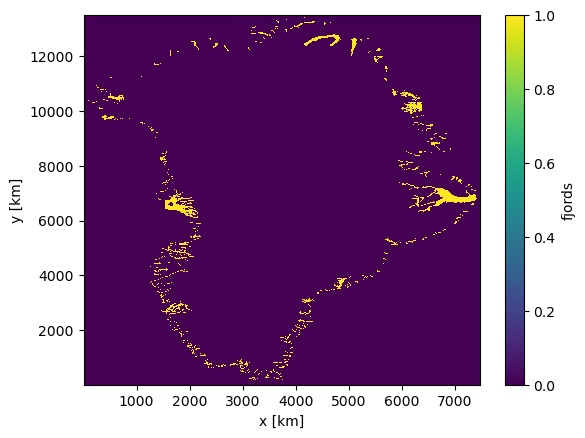

In [19]:
dsmasks1k.fjords.plot(  )

In [20]:
mask_sections = "/Volumes/imau02/rapid/Anneke/RACMO2.3p2/FGRN055/Downscaling_GR/Mask_adjusted_section_numbers_slater_may24.nc"
dsmask_sections = xr.open_dataset(mask_sections)


In [1]:
import xarray as xr
import matplotlib.pyplot as plt


precip_carra_per_basin = "/Volumes/imau02/rapid/Anneke/CARRA/Yearly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.2009-2023.1km.YY.fjords_only.per_basin.nc"
ds_precip_carra_per_basin = xr.open_dataset(precip_carra_per_basin)
# ds.plot()

In [14]:

dict_Moug = {0:"Not GRIS", 1: "NO", 2: "NE", 3: "CE", 4: "SE", 5: "SW", 6: "CW", 7: "NW"}

# Convert to DataFrame
df = ds_precip_carra_per_basin.to_dataframe().reset_index()

# Replace numbers with names
df['section_numbers_adjusted'] = df['section_numbers_adjusted'].replace(dict_Moug)

# Convert back to DataArray
ds_precip_carra_per_basin = df.to_xarray()

In [20]:
import plotly.express as px
fig = px.line(df, x='time', y='precip', color='section_numbers_adjusted', title='Precipitation per basin via CARRA')
# update layout according to ploty_white template
fig.update_layout(template='plotly_white')
# change y label to kg m**-2 * km**2
fig.update_yaxes(title_text='kg m**-2 * km**2')
# more grid lines on x 
fig.update_xaxes(nticks=20)

/Users/annek/opt/anaconda3/envs/phdIIfresh/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [24]:
monthly_precip_cara = "/Volumes/imau02/rapid/Anneke/CARRA/Monthly/RACMOgrid/fjords_only/total_precipitation.CARRA.west_domain.2009-2023.1km.MM.fjords_only.per_basin.nc"
ds_month = xr.open_dataset(monthly_precip_cara)


In [34]:
ds_month

<xarray.Dataset> Size: 12kB
Dimensions:                   (time: 180, section_numbers_adjusted: 7)
Coordinates:
  * time                      (time) datetime64[ns] 1kB 2009-01-01 ... 2023-1...
  * section_numbers_adjusted  (section_numbers_adjusted) float64 56B 1.0 ... 7.0
Data variables:
    precip                    (section_numbers_adjusted, time) float64 10kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-05-16T15:40 GRIB to CDM+CF via cfgrib-0.9.1...
    description:             24h forecast, sum per month

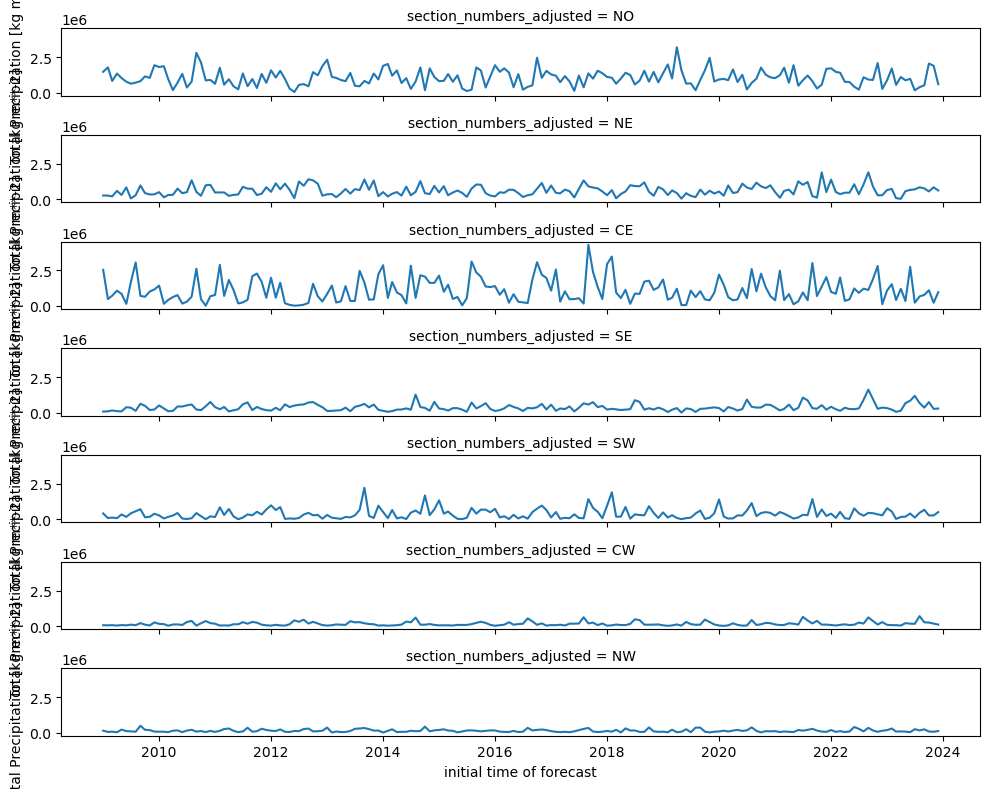

In [41]:
ds_month['precip'].plot.line(x='time', col='section_numbers_adjusted', col_wrap=1, figsize=(10,8))#eep middle label 
# remove ylabel in ax



In [35]:
# Create a new DataArray with replaced values
new_coord = xr.DataArray(
    [dict_Moug.get(n, n) for n in ds_month['section_numbers_adjusted'].values],
    dims='section_numbers_adjusted',
    coords={'section_numbers_adjusted': ds_month['section_numbers_adjusted']}
)

# Assign the new coordinate to the Dataset
ds_month = ds_month.assign_coords(section_numbers_adjusted=new_coord)

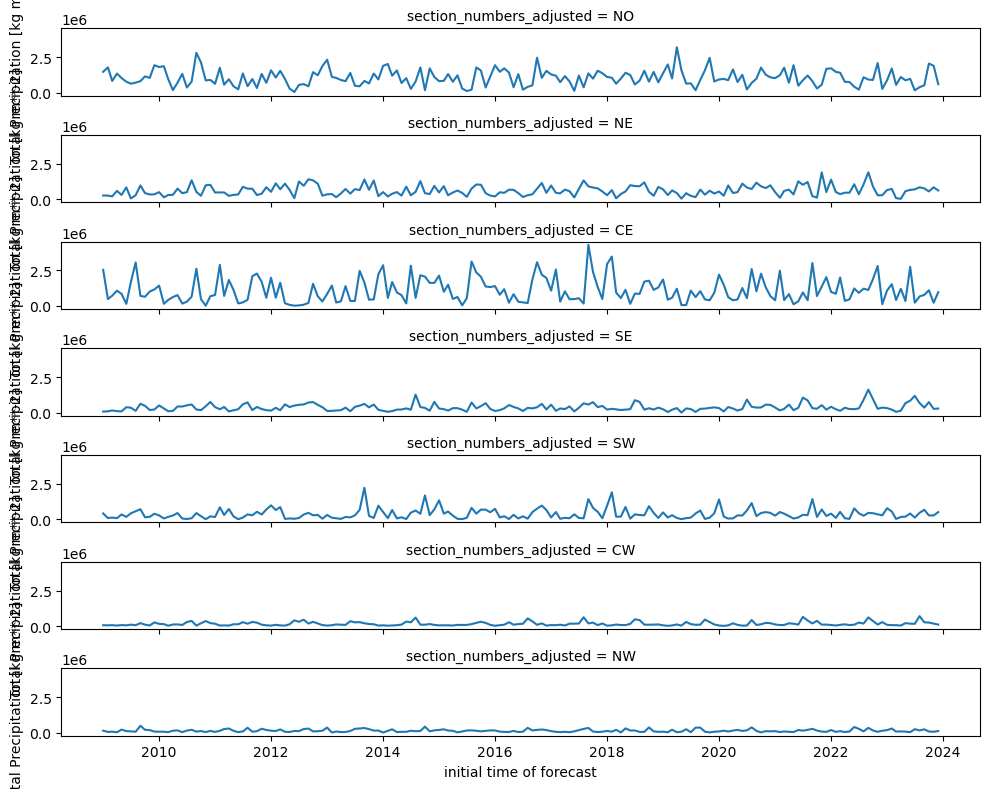

In [42]:
ds_month['precip'].plot.line(x='time', col='section_numbers_adjusted', col_wrap=1, figsize=(10,8))#eep middle label 
